In [54]:
# !pip install hdbscan

In [55]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# df_train_clip = pd.read_csv("/home/docker_current/datasets/train.csv")

with open('image_feat_array.npy', 'rb') as f:
    image_feat_array = np.load(f)

with open('text_feat_array.npy', 'rb') as f:
    text_feat_array = np.load(f)

# image_feat_array = np.asarray(image_feat_array, dtype='float32')

In [89]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=128, random_state=42)
image_feat_array = svd.fit_transform(image_feat_array)

In [90]:
image_feat_array.shape

(2098, 128)

In [91]:
image_feat_embedded = TSNE(n_components=2,
                   init='random', perplexity=5).fit_transform(image_feat_array)

In [95]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
cluster_labels = clusterer.fit_predict(image_feat_array)
len(set(cluster_labels))

33

In [96]:
unique, counts = np.unique(cluster_labels, return_counts=True)
[print('class ', u,'=' , c) for u,c in zip(unique, counts)]

class  -1 = 949
class  0 = 201
class  1 = 5
class  2 = 6
class  3 = 6
class  4 = 9
class  5 = 15
class  6 = 107
class  7 = 13
class  8 = 15
class  9 = 21
class  10 = 8
class  11 = 65
class  12 = 13
class  13 = 9
class  14 = 8
class  15 = 6
class  16 = 15
class  17 = 9
class  18 = 7
class  19 = 51
class  20 = 19
class  21 = 33
class  22 = 138
class  23 = 14
class  24 = 55
class  25 = 7
class  26 = 65
class  27 = 14
class  28 = 102
class  29 = 5
class  30 = 92
class  31 = 16


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

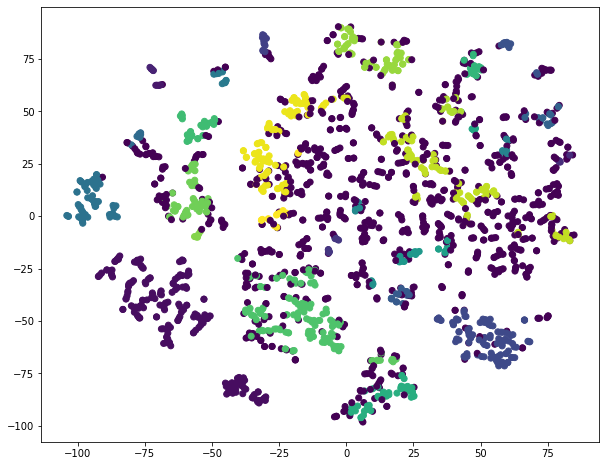

In [99]:
plt.figure(figsize=(10, 8))
plt.scatter(image_feat_embedded[:,0], image_feat_embedded[:,1], c=cluster_labels)
# , cmap='tab20c'